In [2]:
import numpy as np
import pandas as pd
import os

In [4]:
path='.'
# for directory, _ ,filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(directory,filename)) 

.\train.ipynb
.\dataset\sample_submission.csv
.\dataset\test.csv
.\dataset\train.csv


In [8]:
train_data = pd.read_csv(r'.\dataset\train.csv')
test_data = pd.read_csv(r".\dataset\test.csv")

In [15]:
train_data.isnull().sum().sort_values(ascending=False)

label       0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 785, dtype: int64

In [10]:
y_train = train_data['label'].values
X_train = train_data.drop(columns=['label']).values/255
X_test = test_data.values/255

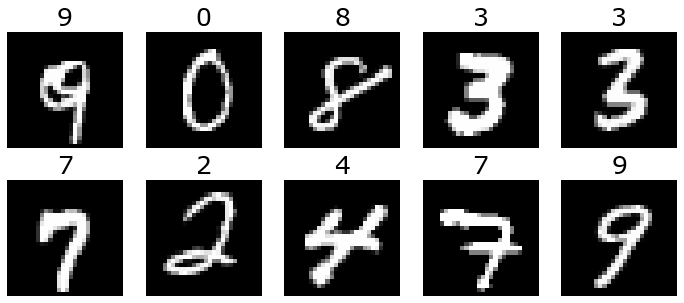

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,42000,size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc =  RandomForestClassifier(random_state=123)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring="accuracy",n_jobs=-1)
CV_rfc.fit(X_train, y_train)

print(CV_rfc.best_estimator_)